,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE


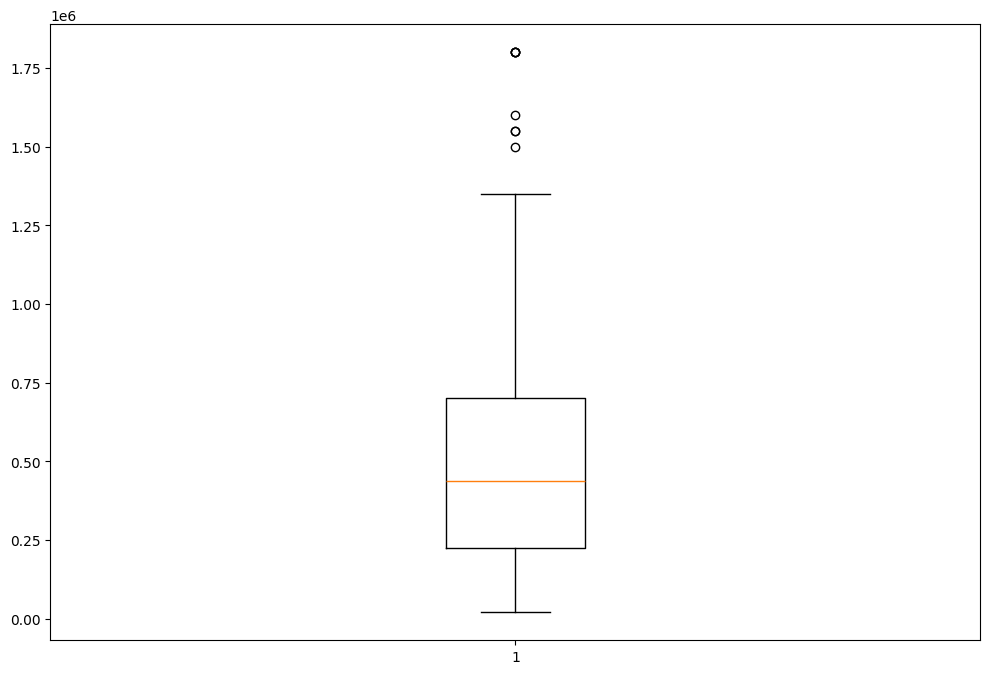

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

%matplotlib inline

data = pd.read_csv('IPL IMB381IPL2013.csv')
data.head(5)


# sb.barplot(x='AGE',y='SOLD PRICE',data=data.groupby('AGE')['SOLD PRICE'].mean().reset_index())

soldPrice_by_age = data.groupby('AGE')['SOLD PRICE'].mean().reset_index()

soldPrice_by_age_role = data.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()

soldprice_comparison  = soldPrice_by_age_role.merge(soldPrice_by_age,on = 'AGE',how = 'outer')

soldprice_comparison.rename(columns={'SOLD PRICE_x':'SOLD_PRICE_AGE_ROLE','SOLD PRICE_y':'SOLD_PRICE_AGE'},inplace=True)

data.columns

plt.figure(figsize=(12, 8))

# sb.barplot(x='AGE',y='SOLD_PRICE_AGE_ROLE', hue='PLAYING ROLE',data=soldprice_comparison)
# plt.xlabel('Value')  # Label for the x-axis
# plt.ylabel('Frequency')  # Label for the y-axis
# counts, bins, patches = plt.hist(data['T-WKTS'],bins=30,label='T-WKTS')

# for count, patch in zip(counts, patches):
#     height = patch.get_height()
#     plt.annotate(f'{int(count)}', 
#                  xy=(patch.get_x() + patch.get_width() / 2, height), 
#                  xytext=(0, 5),  # 5 points vertical offset
#                  textcoords='offset points', 
#                  ha='center', va='bottom')
# plt.xticks(np.arange(bins.min(),bins.max(),step=1))
# plt.legend() 
# plt.show()

# sb.distplot(data['T-WKTS'])

# sb.boxplot(data['SOLD PRICE'])  

box = plt.boxplot(data['SOLD PRICE'])

box['caps']

[item.get_ydata()[0] for item in box['caps']]


[item.get_ydata()[0] for item in box['whiskers']]

[item.get_ydata()[0] for item in box['medians']]

data.columns

data[data['SOLD PRICE']>135000][['PLAYER NAME','SOLD PRICE','PLAYING ROLE']]

upperLimitOutlier = data[data['SOLD PRICE']>135000][['PLAYER NAME','SOLD PRICE','PLAYING ROLE']].reset_index()

# lowerLimitOutlier = data[data['SOLD PRICE']<20000][['PLAYER NAME','SOLD PRICE','PLAYING ROLE']].reset_index()


# data[data['CAPTAINCY EXP']==1][['CAPTAINCY EXP','SOLD PRICE','PLAYER NAME']]
# data[data['CAPTAINCY EXP']==0][['CAPTAINCY EXP','SOLD PRICE','PLAYER NAME']]

# bins=20
# sb.displot(data[data['CAPTAINCY EXP']==1]['SOLD PRICE'],color='y',label='Experince Captin')
# sb.displot(data[data['CAPTAINCY EXP']==0]['SOLD PRICE'],color='r',label='InExprinced Captin')
# plt.legend()

# sb.boxplot(x='PLAYING ROLE',y='SOLD PRICE',data=data)

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

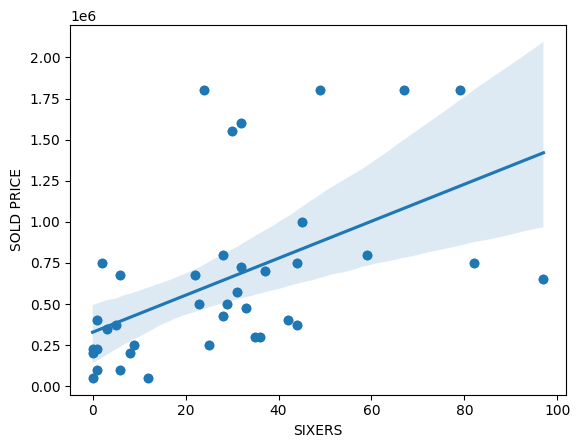

In [43]:
ipl_batsman_df = data[data['PLAYING ROLE']=='Batsman']
plt.scatter(x = ipl_batsman_df.SIXERS,y=ipl_batsman_df['SOLD PRICE'])

sb.regplot(x='SIXERS',y='SOLD PRICE',data=ipl_batsman_df)

data.columns

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


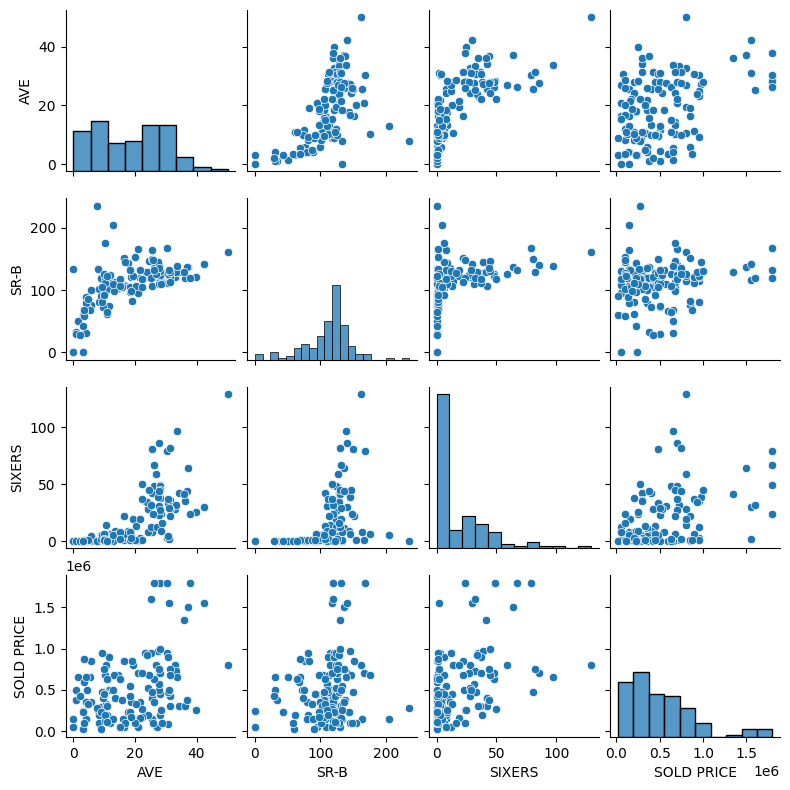

In [44]:
influnctial_features = ['AVE', 'SR-B','SIXERS','SOLD PRICE']

sb.pairplot(data[influnctial_features],size=2)

<Axes: >

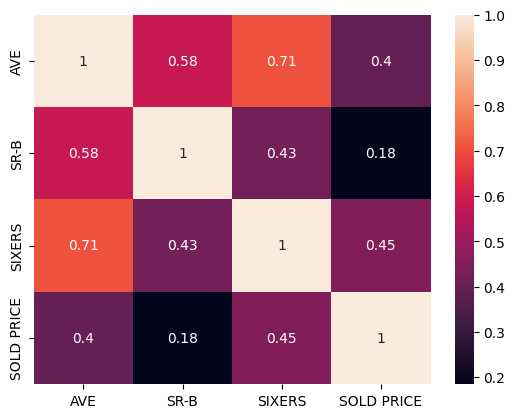

In [46]:
data[influnctial_features].corr()
sb.heatmap(data[influnctial_features].corr(),annot=True
           )